In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import dateutil
import re
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [208]:
df = pd.read_csv("googleplaystore.csv")

In [209]:
df.shape

(10841, 13)

In [210]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [211]:
df["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [212]:
df["Price"].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [213]:
df["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [214]:
df["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

# Preprocess

In [215]:
def DateParser(text):
    try:
        date = dateutil.parser.parse(text)
        return date.strftime("%d/%m/%Y")
    
    except:
        return np.NaN

In [216]:
def SizeParser(text):
    try:
        size = text[:len(text)-1]
        return float(size)
    
    except:
        pass

In [217]:
def PriceParser(text):
    if text != 0:
        text = text.replace("$", "")
        return float(text)
    else:
        return float(0.0)

In [218]:
def android_version(text):
    if not text.startswith("Varies"):
        string = str(text[:3])
        return float(string)
    else:
        return 4.4

In [219]:
df["Last Updated"] = df["Last Updated"].apply(DateParser)
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

/tmp/ipykernel_4308/4214702792.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Last Updated"] = pd.to_datetime(df["Last Updated"])


In [220]:
df = df.dropna(how="any")

In [221]:
df.shape

(9360, 13)

In [222]:
df["Size"] = df["Size"].apply(SizeParser)

In [223]:
df["Size"].astype("float64")

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     NaN
10840    19.0
Name: Size, Length: 9360, dtype: float64

In [224]:
df = df.dropna(how="any")

In [225]:
df.shape

(7723, 13)

In [226]:
le = LabelEncoder()
le.fit(df["Category"])
df["Category"] = le.transform(df["Category"])

In [227]:
le2 = LabelEncoder()
le2.fit(df["Content Rating"])
df["Content Rating"] = le2.transform(df["Content Rating"])

In [228]:
le3 = LabelEncoder()
le3.fit(df["Type"])
df["Type"] = le3.transform(df["Type"])

In [229]:
df["Installs"] = df["Installs"].apply(lambda x: re.sub(r'\D', '', x))
df["Installs"].astype("float64")

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10833        1000.0
10834         500.0
10836        5000.0
10837         100.0
10840    10000000.0
Name: Installs, Length: 7723, dtype: float64

In [230]:
df["Android Ver"] = df["Android Ver"].apply(android_version)

In [231]:
df["Price"] = df["Price"].apply(PriceParser)

In [232]:
df = df.drop(["App", "Genres", "Current Ver"], axis=1)

/tmp/ipykernel_4308/1939481835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="viridis")


<AxesSubplot: >

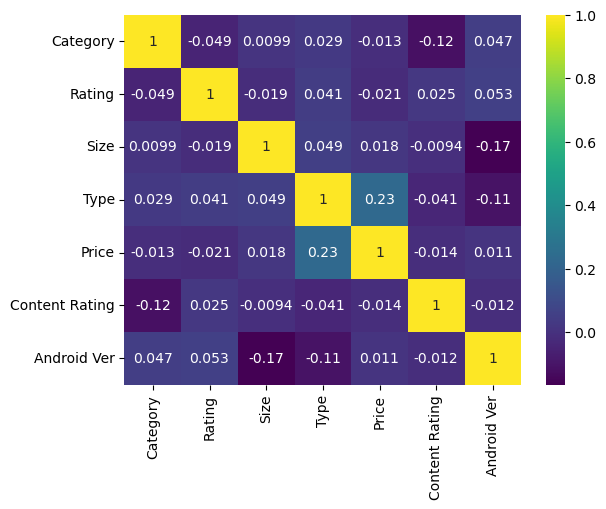

In [233]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")

# Model Training

In [256]:
X = df.drop(["Rating", "Reviews", "Last Updated", "Android Ver"], axis=1)
y = df["Rating"]

In [257]:
X = X[:1000]
y = y[:1000]

In [258]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_train)

In [259]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [261]:
sc = StandardScaler()
pca = PCA()
rf_model = RandomForestRegressor()

model = Pipeline([
    ("sc", sc),
    ("pca", pca),
    ("rf_model", rf_model)
])

In [262]:
model.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                ('rf_model', RandomForestRegressor())])

In [263]:
model.score(X_test, y_test)

0.2615941422008906

In [264]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.5770353466209847

In [265]:
acc = round(rf_model.score(X_test, y_test) * 100, 2)
acc

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-43.15

In [267]:
joblib.dump(model, "RandomForest.pkl")

['RandomForest.pkl']